In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('insurance.csv')

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
dataset.shape

(1338, 7)

In [6]:
print("No. Rows: ",dataset.shape[0])
print("No. Columns: ",dataset.shape[1])

No. Rows:  1338
No. Columns:  7


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
dataset.describe(include='all')    #statistics for both catagorical as well as numerical column

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [11]:
#convert text columns into numerical
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
dataset['sex']=dataset['sex'].map({'female':0,'male':1})

In [13]:
dataset['sex'].unique()

array([0, 1], dtype=int64)

In [14]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [15]:
dataset['smoker']=dataset['smoker'].map({'yes':1,'no':0})

In [16]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [17]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
dataset['region']=dataset['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [19]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [20]:
#store feature matrix in X and response(Target) in vector Y

In [21]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [22]:
#storing independent variables
X=dataset.drop(['charges'],axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [23]:
#storing dependent variables
y=dataset['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [24]:
#split into training and testing data
from sklearn.model_selection import train_test_split

In [25]:
# X_train:independent variables  y_train:target variable  for keeping the sample of training data constant we use random_state
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [27]:
#imporing models  we use model_name.fit(X_train,y_train) to train the model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [29]:
svm=SVR()
svm.fit(X_train,y_train)

SVR()

In [30]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [31]:
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [32]:
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gb.predict(X_test)

In [33]:
df=pd.DataFrame({'Actual':y_test,'LR':y_pred1,'SVM':y_pred2,'RF':y_pred3,'GB':y_pred4})

In [34]:
df

,Actual,LR,SVM,RF,GB
764,9095.06825,8924.407244,9548.261584,11754.639905,11001.128629
887,5272.17580,7116.295018,9492.515425,5186.098186,5840.174656
890,29330.98315,36909.013521,9648.758701,28180.860368,28001.980112
1293,9301.89355,9507.874691,9555.044136,9661.750771,9745.291602
259,33750.29180,27013.350008,9420.421978,34503.204261,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,46871.668311,45431.423211
575,12222.89830,11814.555568,9625.431547,12696.257188,12465.025294
535,6067.12675,7638.107736,9504.168517,6433.152817,6974.336525
543,63770.42801,40959.081722,9605.004594,46663.888685,47862.047791


In [35]:
#checking the best model visually
import matplotlib.pyplot as plt

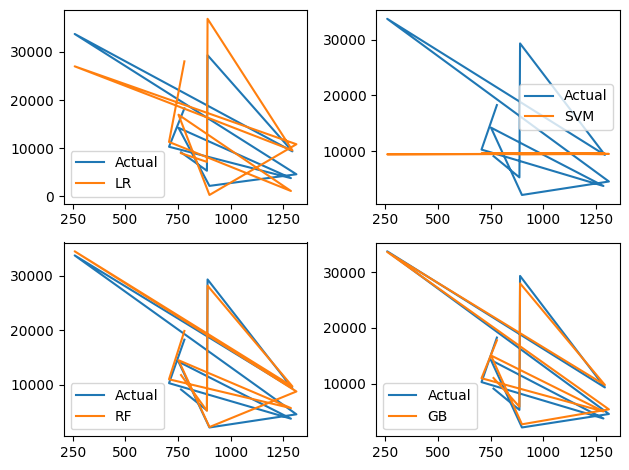

In [36]:
#plot 1: not matching values close to actual, plot 2: predicting a constant value

plt.subplot(221)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['LR'].iloc[0:11],label='LR')
plt.legend()

plt.subplot(222)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['SVM'].iloc[0:11],label='SVM')
plt.legend()

plt.subplot(223)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['RF'].iloc[0:11],label='RF')
plt.legend()

plt.subplot(224)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['GB'].iloc[0:11],label='GB')

plt.tight_layout()
plt.legend()

In [37]:
#evaluating model using r2 score-goodness of fit of the model
from sklearn import metrics

In [38]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [39]:
print(score1,score2,score3,score4)

0.7833463107364539 -0.07229762787861826 0.8703766632858503 0.877993618163719


In [40]:
#another way to find which model is good is mean absolute error
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [41]:
print(s1,s2,s3,s4)

4186.508898366432 8592.428727899724 2450.2280233533907 2447.167158715136


In [42]:
#predicting for a new customer other than testing data
data={'age':40,
        'sex':1,
         'bmi':40.30,
         'children':4,
          'smoker':1,
          'region':2}
df1=pd.DataFrame(data,index=[0])
df1

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [43]:
new_pred=gb.predict(df1)
print(new_pred)


[43931.13613049]


In [44]:
gb=GradientBoostingRegressor()
gb.fit(X,y)

GradientBoostingRegressor()

In [45]:
import joblib

In [46]:
joblib.dump(gb,'model_gb')


['model_gb']

In [47]:
model=joblib.load('model_gb')

In [48]:
model.predict(df1)

array([42148.361888])

In [49]:
from tkinter import *

In [50]:
import joblib

In [51]:
def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    model=joblib.load('model_gb') 
    result=model.predict([p1,p2,p3,p4,p5,p6])
    Label(master,text='Insurance Cost: ').grid(row=7)
    Label(master,text=result).grid(row=8)
    
master=Tk()
master.title('Insurance Cost Prediction')
label=Label(master,text="Insurance Cost Prediction",bg='black',fg='white').grid(row=0,columnspan=2)
Label(master,text="Enter Your Age").grid(row=1)
Label(master,text='Male or Female [1/0]').grid(row=2)
Label(master,text="Enter Your BMI Value").grid(row=3)
Label(master,text='Enter Number of Children').grid(row=4)
Label(master,text='Smoker Yes/No [1/0]').grid(row=5)
Label(master,text='Region [1-4]').grid(row=6)
      
e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
      
e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

Button(master,text="Predict",command=show_entry).grid()
master.mainloop()